In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("Data Cleaned.csv")
df

,Transaction_Number,Customer_ID,Time stamp,Time_stamp_changed,Category,Amount_Transacted,First,Last,Gender,Street,City,Is_fraud,Credit_Limit,No_of_Transactions,Amounts_received_per_day,Card_Type,Authentication
0,51250,6.59,30/01/2019 23:16,30/01/2019 23:16,kids_pets,297820.000,Amanda,Molina,Female,8425 Daniel Knolls Suite 288,Philadelphia,0,1000000,2,42187,Platinum,Success
1,51528,6.59,31/01/2019 05:41,31/01/2019 05:41,grocery_net,687879.000,Amanda,Molina,Female,8425 Daniel Knolls Suite 288,Philadelphia,0,1000000,3,98637,Platinum,Success
2,53779,6.59,02/01/2019 20:58,01/02/2019 20:58,personal_care,738456.000,Amanda,Molina,Female,8425 Daniel Knolls Suite 288,Philadelphia,0,1000000,1,21304,Platinum,Success
3,56675,6.59,02/03/2019 15:56,03/02/2019 15:56,shopping_net,378535.000,Amanda,Molina,Female,8425 Daniel Knolls Suite 288,Philadelphia,0,1000000,1,73556,Platinum,Success
4,59880,6.59,02/04/2019 23:48,04/02/2019 23:48,shopping_pos,334116.000,Amanda,Molina,Female,8425 Daniel Knolls Suite 288,Philadelphia,0,1000000,2,36610,Platinum,Success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,22846,2.23,14/01/2019 13:49,14/01/2019 13:49,kids_pets,274395.000,Thomas,Hale,Male,949 Smith Parkway,Cazenovia,0,700000,1,33735,Gold,Success
283,23536,2.23,14/01/2019 19:17,14/01/2019 19:17,entertainment,356344.375,Thomas,Hale,Male,949 Smith Parkway,Cazenovia,0,700000,1,66024,Gold,Success
284,23633,2.23,14/01/2019 20:05,14/01/2019 20:05,home,105690.000,Thomas,Hale,Male,949 Smith Parkway,Cazenovia,0,700000,2,40135,Gold,Success
285,23667,2.23,14/01/2019 20:17,14/01/2019 20:17,health_fitness,694888.000,Thomas,Hale,Male,949 Smith Parkway,Cazenovia,0,700000,1,67884,Gold,Success


In [2]:
#To exclude the categorical features for scaling 
df_values = df.select_dtypes(exclude=['object'])
df_values


,Transaction_Number,Customer_ID,Amount_Transacted,Is_fraud,Credit_Limit,No_of_Transactions,Amounts_received_per_day
0,51250,6.59,297820.000,0,1000000,2,42187
1,51528,6.59,687879.000,0,1000000,3,98637
2,53779,6.59,738456.000,0,1000000,1,21304
3,56675,6.59,378535.000,0,1000000,1,73556
4,59880,6.59,334116.000,0,1000000,2,36610
...,...,...,...,...,...,...,...
282,22846,2.23,274395.000,0,700000,1,33735
283,23536,2.23,356344.375,0,700000,1,66024
284,23633,2.23,105690.000,0,700000,2,40135
285,23667,2.23,694888.000,0,700000,1,67884



1. Normalisation:  Using MinMax Scaler 

In [3]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df_values)
df_normalized = pd.DataFrame(x_scaled)
df_normalized

,0,1,2,3,4,5,6
0,0.112502,0.834495,0.105544,0.0,1.000000,0.125,0.039123
1,0.113112,0.834495,0.319817,0.0,1.000000,0.250,0.107745
2,0.118056,0.834495,0.347601,0.0,1.000000,0.000,0.013738
3,0.124415,0.834495,0.149883,0.0,1.000000,0.000,0.077256
4,0.131453,0.834495,0.125482,0.0,1.000000,0.125,0.032344
...,...,...,...,...,...,...,...
282,0.050127,0.074913,0.092676,0.0,0.500000,0.000,0.028849
283,0.051643,0.074913,0.137693,0.0,0.500000,0.000,0.068100
284,0.051856,0.074913,0.000000,0.0,0.500000,0.125,0.036629
285,0.051930,0.074913,0.323667,0.0,0.500000,0.000,0.070361


In [4]:
df_values

,Transaction_Number,Customer_ID,Amount_Transacted,Is_fraud,Credit_Limit,No_of_Transactions,Amounts_received_per_day
0,51250,6.59,297820.000,0,1000000,2,42187
1,51528,6.59,687879.000,0,1000000,3,98637
2,53779,6.59,738456.000,0,1000000,1,21304
3,56675,6.59,378535.000,0,1000000,1,73556
4,59880,6.59,334116.000,0,1000000,2,36610
...,...,...,...,...,...,...,...
282,22846,2.23,274395.000,0,700000,1,33735
283,23536,2.23,356344.375,0,700000,1,66024
284,23633,2.23,105690.000,0,700000,2,40135
285,23667,2.23,694888.000,0,700000,1,67884


Standardisation using standard scaler 

In [5]:
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
scaled_df = scaling.fit_transform(df_values)
scaled_df

#here, the numerical features are now centered on the mean with a unit standard deviation

array([[-0.47875819,  0.44593911, -0.59286263, ...,  1.29546192,
        -0.1399945 , -0.01460534],
       [-0.47644007,  0.44593911,  0.94026337, ...,  1.29546192,
         0.54099569,  1.03583063],
       [-0.45766999,  0.44593911,  1.13905615, ...,  1.29546192,
        -0.82098469, -0.40320152],
       ...,
       [-0.70904402, -2.05961758, -1.34802915, ..., -0.05325962,
        -0.1399945 , -0.05278948],
       [-0.70876051, -2.05961758,  0.96781223, ..., -0.05325962,
        -0.82098469,  0.46357098],
       [-0.75259629,  0.95739449,  0.59630159, ...,  0.84588807,
        -0.82098469,  0.14782611]])

Model training

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [7]:
df_normalized.columns = ['transaction_number', 'customer_id', 'amount_transacted','is_fraud', 'credit_limit','transactions_done','amounts_received']
df_normalized

,transaction_number,customer_id,amount_transacted,is_fraud,credit_limit,transactions_done,amounts_received
0,0.112502,0.834495,0.105544,0.0,1.000000,0.125,0.039123
1,0.113112,0.834495,0.319817,0.0,1.000000,0.250,0.107745
2,0.118056,0.834495,0.347601,0.0,1.000000,0.000,0.013738
3,0.124415,0.834495,0.149883,0.0,1.000000,0.000,0.077256
4,0.131453,0.834495,0.125482,0.0,1.000000,0.125,0.032344
...,...,...,...,...,...,...,...
282,0.050127,0.074913,0.092676,0.0,0.500000,0.000,0.028849
283,0.051643,0.074913,0.137693,0.0,0.500000,0.000,0.068100
284,0.051856,0.074913,0.000000,0.0,0.500000,0.125,0.036629
285,0.051930,0.074913,0.323667,0.0,0.500000,0.000,0.070361


In [8]:
df_normalized['is_fraud'].value_counts() #our data is well balanced

0.0    146
1.0    141
Name: is_fraud, dtype: int64

In [9]:
legit = df_normalized[df_normalized.is_fraud==0]
fraud = df_normalized[df_normalized.is_fraud==1]


In [10]:
legit.shape #view legit 


(146, 7)

In [11]:
fraud.shape #view fraus

(141, 7)

In [12]:
#statistical measures of the data
#Amount transacted and is_fraud is our key column
df_normalized.groupby('is_fraud').mean()

,transaction_number,customer_id,amount_transacted,credit_limit,transactions_done,amounts_received
is_fraud,,,,,,
0.0,0.141357,0.494284,0.232239,0.682648,0.082192,0.056030
1.0,0.339259,0.911595,0.143014,0.351064,0.221631,0.023559


USING NORMALISED DATA

In [13]:
#splitting data into features and targets
X = df_normalized.drop(columns='is_fraud', axis = 1)
Y = df_normalized['is_fraud']


In [14]:
#split the data into training and testing data
#splits x and y split randomly and sorting will depend on Y
#20% of data is test and 80% is train
#stratify Y means there will be an evenly distributed into 2 classes in x train and x test 
#random state means data will split into 2

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
X.shape, X_train.shape, X_test.shape #to sample and see how X has been split 

((287, 6), (229, 6), (58, 6))

Model Training
Logistic Regression Model

In [15]:
model = LogisticRegression()

In [16]:
#training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression()

Model evaluation 

We use the accuracy score

In [17]:
#checking accuracy on training data 
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
'Accuracy of Training data: ', training_data_accuracy

('Accuracy of Training data: ', 0.9432314410480349)

In [18]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
'Accuracy of Test data: ', test_data_accuracy #89% is close to the 94% in the test accuracy so not bad

('Accuracy of Test data: ', 0.896551724137931)

Text(0.5, 33.0, 'Predicted Values')

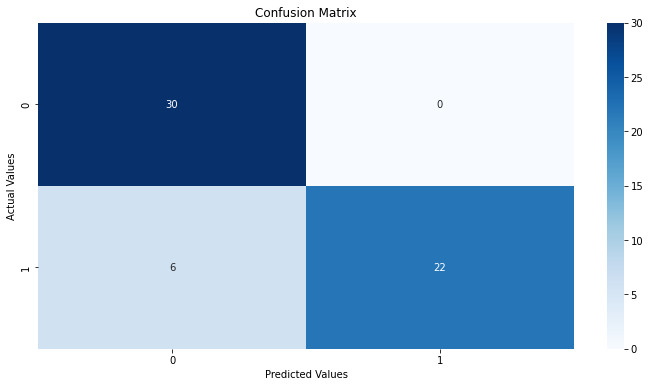

In [19]:
#confusion matrix - A performance measurement for machine learning classification 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,X_test_prediction)
plt.figure(figsize=(12,6))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

In [20]:
new=[[23432, 7.99,900000000000,1000000,7,2000000000]]
min_max_scaler = preprocessing.MinMaxScaler()
new_scaled = min_max_scaler.fit_transform(new)
result=model.predict(new_scaled)
if result==1:
    print('Warning! This is a Fraudulent Transaction!')
else:
    print('This is a Legitimate Transaction')


This is a Legitimate Transaction


/Users/rosemarykanyoro/opt/miniconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


USING STANDARDIZED DATA 
do not use same letters as those used in normalisation as it will alter the result. Here I used x and y (small caps)

In [21]:
df_values

,Transaction_Number,Customer_ID,Amount_Transacted,Is_fraud,Credit_Limit,No_of_Transactions,Amounts_received_per_day
0,51250,6.59,297820.000,0,1000000,2,42187
1,51528,6.59,687879.000,0,1000000,3,98637
2,53779,6.59,738456.000,0,1000000,1,21304
3,56675,6.59,378535.000,0,1000000,1,73556
4,59880,6.59,334116.000,0,1000000,2,36610
...,...,...,...,...,...,...,...
282,22846,2.23,274395.000,0,700000,1,33735
283,23536,2.23,356344.375,0,700000,1,66024
284,23633,2.23,105690.000,0,700000,2,40135
285,23667,2.23,694888.000,0,700000,1,67884


In [27]:
#assigning the scaled X and y
#x takes cust_id,amt_trans,credit_limit,transactions,amt_received
x = df_values.iloc[:, [1,2, 4, 5, 6]].values
y = df_values.iloc[:, 3].values

In [28]:
#splitting dataset into training and set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)
x.shape, x_train.shape, x_test.shape #to sample and see how X has been split 

((287, 5), (229, 5), (58, 5))

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [30]:
#logistic regression to the training set
classifier = LogisticRegression(random_state = 2)
classifier.fit(x_train, y_train)




LogisticRegression(random_state=2)

In [31]:
#predict and get accuracy for test data
y_pred = classifier.predict(x_test)
test_acc = accuracy_score(y_test, y_pred)
'Accuracy of Training data: ', test_acc*100

('Accuracy of Training data: ', 89.65517241379311)

Text(0.5, 33.0, 'Predicted Values')

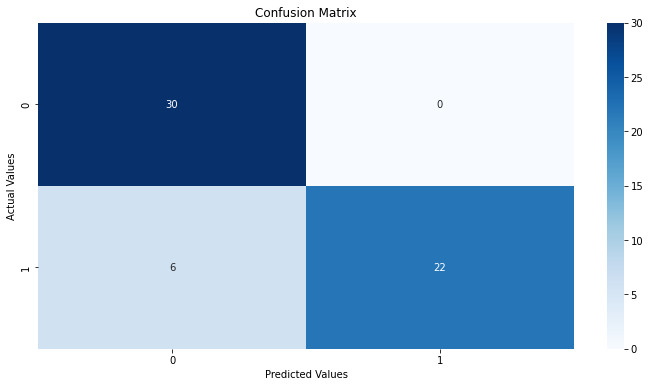

In [32]:

#confusion matrix - A performance measurement for machine learning classification 

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

In [33]:
#view a classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        30
           1       1.00      0.79      0.88        28

    accuracy                           0.90        58
   macro avg       0.92      0.89      0.89        58
weighted avg       0.91      0.90      0.90        58



In [34]:
new_customer=[[ 7.99,9000000,1000000,7,2000000]]
scaled_result = sc.transform(new_customer)
result=classifier.predict(scaled_result)
if result==1:
    print('Warning! This is a Fraudulent Transaction!')
else:
    print('This is a Legitimate Transaction')

Warning! This is a Fraudulent Transaction!
